In [1]:
from deepface.commons import functions, distance as dst
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Build ArcFace Model

In [2]:
#Ref: https://github.com/serengil/deepface/blob/master/deepface/basemodels/ArcFace.py
import ArcFace

In [3]:
model = ArcFace.loadModel()

In [4]:
#Ref: https://drive.google.com/uc?id=1LVB3CdVejpmGHM28BpqqkbZP5hDEcdZY
model.load_weights("arcface_weights.h5")

In [5]:
print("ArcFace expects ",model.layers[0].input_shape[1:]," inputs")
print("and it represents faces as ", model.layers[-1].output_shape[1:]," dimensional vectors")

ArcFace expects  (112, 112, 3)  inputs
and it represents faces as  (512,)  dimensional vectors


In [6]:
target_size = model.layers[0].input_shape[1:3]

## Early Stages of Pipeline

A modern face recognition pipeline consists of 4 common stages: detect, align, represent and verify. ArcFace model handles representation. Here, we will apply detection and alignment within deepface.

**Blog post:** [A Modern Face Recognition Pipeline](https://sefiks.com/2020/05/01/a-gentle-introduction-to-face-recognition-in-deep-learning/)

**Vlog:** [How Face Recognition Works with Deep Learning in Python](https://youtu.be/OYialFo7Qo4)

In [7]:
img1_path = "img1.jpg"
img2_path = "img2.jpg"
img3_path = "img3.jpg"
img4_path = "img4.jpg"
img5_path = "img5.jpg"
img6_path = "img6.jpg"

In [8]:
detector_backend = 'opencv'

img1 = functions.preprocess_face(img1_path, target_size = target_size, detector_backend = detector_backend)
img2 = functions.preprocess_face(img2_path, target_size = target_size, detector_backend = detector_backend)
img3 = functions.preprocess_face(img3_path, target_size = target_size, detector_backend = detector_backend)
img4 = functions.preprocess_face(img4_path, target_size = target_size, detector_backend = detector_backend)
img5 = functions.preprocess_face(img5_path, target_size = target_size, detector_backend = detector_backend)
img6 = functions.preprocess_face(img6_path, target_size = target_size, detector_backend = detector_backend)

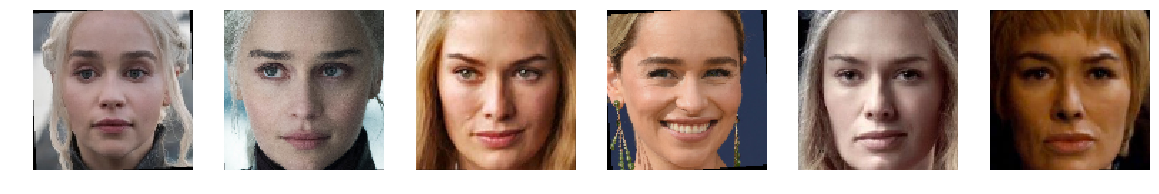

In [9]:
fig = plt.figure(figsize = (20, 20))

ax1 = fig.add_subplot(1,6,1)
plt.axis('off')
plt.imshow(img1[0][:,:,::-1])

ax1 = fig.add_subplot(1,6,2)
plt.axis('off')
plt.imshow(img2[0][:,:,::-1])

ax1 = fig.add_subplot(1,6,3)
plt.axis('off')
plt.imshow(img3[0][:,:,::-1])

ax1 = fig.add_subplot(1,6,4)
plt.axis('off')
plt.imshow(img4[0][:,:,::-1])

ax1 = fig.add_subplot(1,6,5)
plt.axis('off')
plt.imshow(img5[0][:,:,::-1])

ax1 = fig.add_subplot(1,6,6)
plt.axis('off')
plt.imshow(img6[0][:,:,::-1])

plt.show()

## Represent and verify

ArcFace is responsible for representing faces as 512 dimensional vectors

We will find distance between embeddings to verify they are same person or different persons

In [10]:
metric = 'euclidean'

In [11]:
def findThreshold(metric):
    if metric == 'cosine':
        return 0.6871912959056619
    elif metric == 'euclidean':
        return 4.1591468986978075
    elif metric == 'euclidean_l2':
        return 1.1315718048269017

In [12]:
def verify(img1, img2):
    
    #representation
    
    img1_embedding = model.predict(img1)[0]
    img2_embedding = model.predict(img2)[0]

    if metric == 'cosine':
        distance = dst.findCosineDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean':
        distance = dst.findEuclideanDistance(img1_embedding, img2_embedding)
    elif metric == 'euclidean_l2':
        distance = dst.findEuclideanDistance(dst.l2_normalize(img1_embedding), dst.l2_normalize(img2_embedding))
    
    #------------------------------
    #verification
    
    threshold = findThreshold(metric)
    
    if distance <= threshold:
        print("they are same person")
    else:
        print("they are different persons")
    
    print("Distance is ",round(distance, 2)," whereas as expected max threshold is ",round(threshold, 2))
    
    #------------------------------
    #display
    
    fig = plt.figure()
    
    ax1 = fig.add_subplot(1,2,1)
    plt.axis('off')
    plt.imshow(img1[0][:,:,::-1])
    
    ax2 = fig.add_subplot(1,2,2)
    plt.axis('off')
    plt.imshow(img2[0][:,:,::-1])
    
    plt.show()
    

## True positive pairs

they are same person
Distance is  3.9  whereas as expected max threshold is  4.16


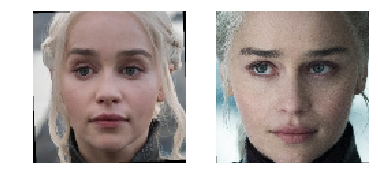

In [13]:
verify(img1, img2)

they are same person
Distance is  4.13  whereas as expected max threshold is  4.16


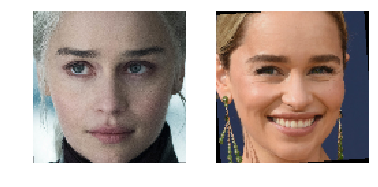

In [14]:
verify(img2, img4)

they are same person
Distance is  4.02  whereas as expected max threshold is  4.16


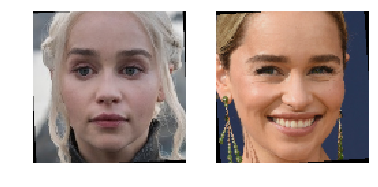

In [15]:
verify(img1, img4)

they are same person
Distance is  2.67  whereas as expected max threshold is  4.16


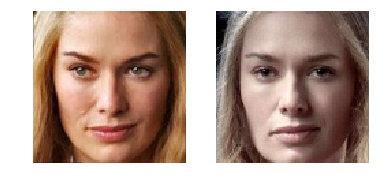

In [16]:
verify(img3, img5)

they are same person
Distance is  3.61  whereas as expected max threshold is  4.16


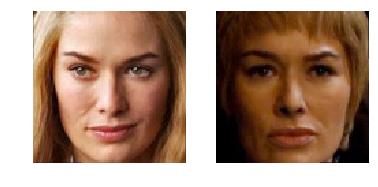

In [17]:
verify(img3, img6)

they are same person
Distance is  3.7  whereas as expected max threshold is  4.16


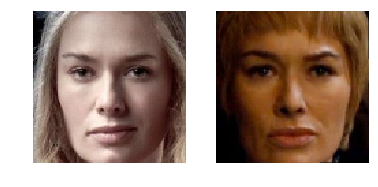

In [18]:
verify(img5, img6)

## True negative pairs

they are different persons
Distance is  5.47  whereas as expected max threshold is  4.16


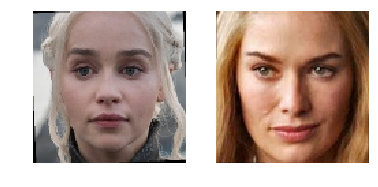

In [19]:
verify(img1, img3)

they are different persons
Distance is  5.7  whereas as expected max threshold is  4.16


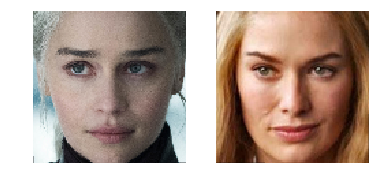

In [20]:
verify(img2, img3)

they are different persons
Distance is  5.09  whereas as expected max threshold is  4.16


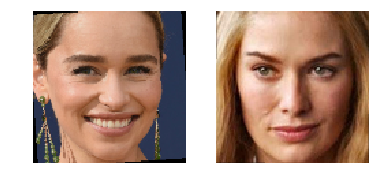

In [21]:
verify(img4, img3)

they are different persons
Distance is  5.42  whereas as expected max threshold is  4.16


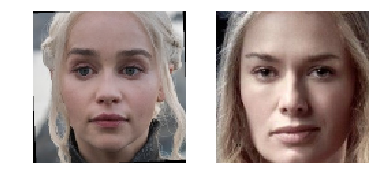

In [22]:
verify(img1, img5)

they are different persons
Distance is  5.77  whereas as expected max threshold is  4.16


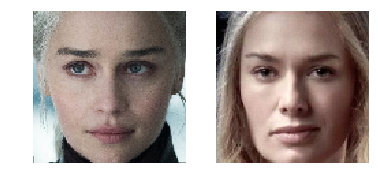

In [23]:
verify(img2, img5)

they are different persons
Distance is  5.05  whereas as expected max threshold is  4.16


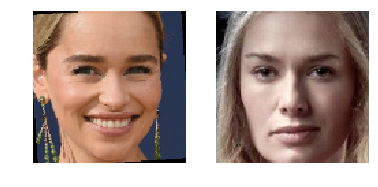

In [24]:
verify(img4, img5)

they are different persons
Distance is  5.32  whereas as expected max threshold is  4.16


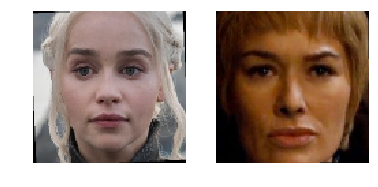

In [25]:
verify(img1, img6)

they are different persons
Distance is  5.76  whereas as expected max threshold is  4.16


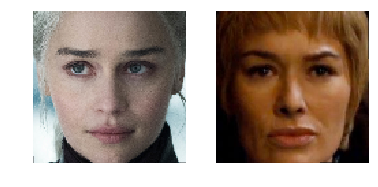

In [26]:
verify(img2, img6)

they are different persons
Distance is  4.91  whereas as expected max threshold is  4.16


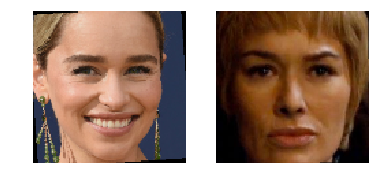

In [27]:
verify(img4, img6)

# Running ArcFace in DeepFace

In [28]:
#!pip install deepface
#Repo: https://github.com/serengil/deepface
from deepface import DeepFace

In [37]:
DeepFace.verify(img1_path, img2_path, model_name="ArcFace", detector_backend='opencv', distance_metric='euclidean')

{'distance': 3.902081,
 'max_threshold_to_verify': 4.1591468986978075,
 'model': 'ArcFace',
 'similarity_metric': 'euclidean',
 'verified': True}

In [36]:
DeepFace.verify(img1_path, img3_path, model_name="ArcFace", detector_backend='opencv', distance_metric='euclidean')

{'distance': 5.4713435,
 'max_threshold_to_verify': 4.1591468986978075,
 'model': 'ArcFace',
 'similarity_metric': 'euclidean',
 'verified': False}